In [1]:
import tweepy
from os import environ,listdir
import json, pandas as pd
from os.path import expanduser, join

In [71]:
token = environ.get('BEARER_TOKEN')

cli = tweepy.Client(bearer_token = token,wait_on_rate_limit=True)


In [72]:
twitter_fields = 'attachments,context_annotations,conversation_id,created_at,entities,in_reply_to_user_id,lang,public_metrics,referenced_tweets,source'

In [73]:
user_fields = 'description,created_at,location,entities,public_metrics,verified'

In [74]:
place_fields = 'country,name'

In [19]:
data = cli.get_users_tweets(20646711, user_fields = user_fields, place_fields = place_fields, tweet_fields = twitter_fields, place_fields = place_fields)

In [77]:
eg = cli.get_tweet(1587777181081559041, tweet_fields=twitter_fields, user_fields=user_fields, place_fields = place_fields)

In [78]:
eg

Response(data=<Tweet id=1587777181081559041 text='Of all journalists killed in 2021, 11% were women. In 2020, this was 6%. (Source: @UNESCO)\n\nOn the International Day to #EndImpunity for Crimes against Journalists, let us say out loud:\n\n𝐒𝐓𝐎𝐏 \n𝐓𝐀𝐑𝐆𝐄𝐓𝐈𝐍𝐆 \n𝐖𝐎𝐌𝐄𝐍 \n𝐉𝐎𝐔𝐑𝐍𝐀𝐋𝐈𝐒𝐓𝐒\n\n#ProtectJournalists https://t.co/FTeCmSYgIJ'>, includes={}, errors=[], meta={})

In [19]:
from datetime import datetime as dt
from datetime import timedelta as td

year = dt.now() - td(days=300)

In [20]:
dat = cli.get_users_tweets(20646711, max_results = 100, exclude = 'retweets', end_time=year,
    user_fields = user_fields, tweet_fields = twitter_fields, place_fields = place_fields)

In [54]:
dat['meta']#.keys()

{'next_token': '7140dibdnow9c7btw423wwlmrmx7mu5lna1wujg9gexbs',
 'result_count': 100,
 'newest_id': '1586765015960276993',
 'oldest_id': '1582219999594549248'}

In [34]:
topics = [i['entity']['name'] for i in data['data'][0]['context_annotations']]

In [2]:
path = expanduser('~/spark_apps/unesco_mentions/')

In [3]:
df_data = []
for f in listdir(path):
    with open(join(path,f),'r') as fp:
        df_data.extend(json.load(fp))

In [4]:
df = pd.DataFrame(df_data)

In [151]:
df_data[0]['conversation_id']

'1587777181081559041'

In [5]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [84]:
len(df['conversation_id'].unique())

3585

In [45]:
links = r'https?://[\w\.\d/]+'

In [47]:
df['text'] = df['text'].str.replace(links,'',regex=True)

In [48]:
mentions = list(df[df['lang']=='en']['text'])

In [92]:
eg

Response(data=<Tweet id=1587777181081559041 text='Of all journalists killed in 2021, 11% were women. In 2020, this was 6%. (Source: @UNESCO)\n\nOn the International Day to #EndImpunity for Crimes against Journalists, let us say out loud:\n\n𝐒𝐓𝐎𝐏 \n𝐓𝐀𝐑𝐆𝐄𝐓𝐈𝐍𝐆 \n𝐖𝐎𝐌𝐄𝐍 \n𝐉𝐎𝐔𝐑𝐍𝐀𝐋𝐈𝐒𝐓𝐒\n\n#ProtectJournalists https://t.co/FTeCmSYgIJ'>, includes={}, errors=[], meta={})

In [104]:
len(c_ids)

3585

In [105]:
i

1900

In [ ]:
convos = pd.DataFrame()
c_ids = df['conversation_id'].unique()
start = 0
div = 1

In [108]:
start = 1800

1800

In [106]:
div = 19

19

In [109]:
i

1900

In [110]:
# convos = pd.DataFrame()
# c_ids = df['conversation_id'].unique()
# start = 0
# div = 1
for i in range(1900,len(c_ids), 100):
    d = cli.get_tweets(list(c_ids[start:i]), tweet_fields=twitter_fields, user_fields=user_fields, place_fields = place_fields)
    start+= int(i/div)
    div += 1
    convos = pd.concat((convos, pd.DataFrame(d.data)))

In [115]:
path

'/home/blunt/spark_apps/convo_roots/'

In [ ]:
join()

In [117]:
convos.to_json(join(path,'convo_0.json'), orient='records')

In [122]:
hashtags = r'#[\w\d]+'

In [132]:
usernames = r'@[\w\d_]+'

In [136]:
convos['text'] = convos['text'].str.replace(hashtags, '', regex = True).str.replace(links, '', regex = True).str.replace(usernames, '', regex = True).str.replace(r'\s+', ' ', regex = True)

In [146]:
convos['text'] = convos['text'].str.lower()

In [147]:
convo_heads = list(convos['text'])

In [142]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [143]:
from wordcloud import STOPWORDS

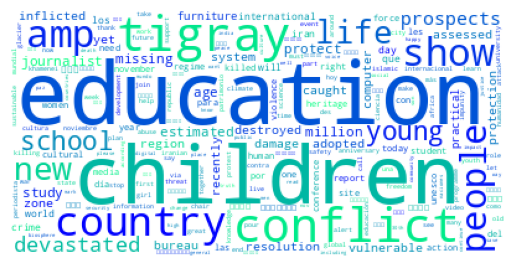

In [149]:
# wc_data = df.groupby('hashtags').sum(numeric_only=True)
# wc = wc_data.to_dict()['like_count']

cloud = WordCloud(min_word_length=3, colormap = 'winter',max_words=500,width = 400, height = 200,prefer_horizontal = 0.95,
        background_color = 'white',collocations = False, stopwords=STOPWORDS).generate(' '.join(convo_heads))

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(cloud)

In [118]:
# list(convos[convos['lang']=='en']['text'])

In [ ]:
df[~df['conversation_id'].duplicated()]

In [7]:
from textblob import TextBlob


In [49]:
sentiments = [TextBlob(i).sentiment for i in mentions]

In [50]:
sent = pd.DataFrame(sentiments)

In [51]:
sent['text'] = mentions

In [52]:
sent.describe()

,polarity,subjectivity
count,9195.000000,9195.000000
mean,0.019404,0.324008
std,0.259395,0.300199
min,-1.000000,0.000000
25%,-0.031818,0.000000
50%,0.000000,0.294444
75%,0.100000,0.500000
max,1.000000,1.000000


In [85]:
path = expanduser('~/spark_apps/convo_roots/')

In [54]:
negs = sent[sent['polarity']<0].sort_values('polarity').round(1)

In [87]:
df['entities']

0        {'mentions': [{'start': 0, 'end': 16, 'usernam...
1        {'urls': [{'start': 241, 'end': 264, 'url': 'h...
2        {'mentions': [{'start': 0, 'end': 9, 'username...
3        {'mentions': [{'start': 0, 'end': 9, 'username...
4        {'mentions': [{'start': 0, 'end': 9, 'username...
                               ...                        
12973    {'mentions': [{'start': 162, 'end': 169, 'user...
12974    {'mentions': [{'start': 166, 'end': 173, 'user...
12975    {'mentions': [{'start': 117, 'end': 133, 'user...
12976    {'mentions': [{'start': 0, 'end': 7, 'username...
12977    {'mentions': [{'start': 0, 'end': 9, 'username...
Name: entities, Length: 12978, dtype: object

In [119]:
# negs.head(50)

In [82]:
mentions[1648]

'@UN_Women @UNESCO You are correct. This is horrible! It should be 50% women.'